# ANALYZE EXPERIMENTS

In [12]:
import smarte.constants as cn
import smarte as smt

from dask.distributed import Client
import dask.dataframe as dd
import dask
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from io import StringIO
import zipfile

In [2]:
client = Client(n_workers=4)
client

/home/ubuntu/smarte/smt/lib/python3.6/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34411 instead
  http_address["port"], self.http_server.port


Client Scheduler: tcp://127.0.0.1:44197 Dashboard: http://127.0.0.1:34411/status,Cluster Workers: 4 Cores: 4 Memory: 8.21 GB


# Helpers

In [3]:
def extractZipped(file_name="experiments.zip"):
    # Extract the compressed data
    archive_path = os.path.join(cn.EXPERIMENT_DIR, "experiments.zip")
    dfs = []
    with zipfile.ZipFile(archive_path) as myzip:
        for ffile in myzip.namelist():
            with myzip.open(ffile) as myfile:
                byte_lines = (myfile.readlines())
                lines = [l.decode() for l in byte_lines]
                lines = "\n".join(lines)
                df = pd.read_csv(StringIO(lines))
                dfs.append(df)
    return pd.concat(dfs)

# Data Overview

In [4]:
DF = extractZipped()
DF.head()

,biomodel_num,num_species,num_reaction,num_parameter,columns_deleted,max_fev,method,noise_mag,num_latincube,range_min_frac,range_max_frac,ts_instance,median_err,max_err,min_err,avg_time,cnt,tot_time,status
0,1,12.0,17.0,35.0,0,10000,differential_evolution,0.1,1,0.5,2.0,1,-0.006678,0.998357,-0.006678,0.000226,1087.0,0.245964,Success!
1,1,12.0,17.0,35.0,0,10000,differential_evolution,0.1,1,0.5,2.0,2,0.268319,0.999995,0.056120,0.000233,1087.0,0.253108,Success!
2,1,12.0,17.0,35.0,0,10000,differential_evolution,0.1,1,0.5,2.0,3,0.176863,0.999158,0.032290,0.000260,1087.0,0.282281,Success!
3,1,12.0,17.0,35.0,0,10000,differential_evolution,0.1,1,0.5,2.0,4,-0.101451,-0.999998,0.041311,0.000267,1087.0,0.290280,Success!
4,1,12.0,17.0,35.0,0,10000,differential_evolution,0.1,1,0.5,2.0,5,0.345762,-0.999840,-0.067118,0.000264,1087.0,0.286798,Success!


# Create the dataframe of experiments

In [30]:
if True:
    DF = dd.read_csv(os.path.join(cn.EXPERIMENT_DIR, "*.csv"))
    for column in DF.columns:
        if "Unnamed" in column:
            del DF[column]
    # Eliminate status != success
    DF = DF[DF[cn.SD_STATUS] == "Success!"]

In [ ]:
if False:
    path = os.path.join(cn.EXPERIMENT_DIR, "workunits.txt")
    with open(path, "r") as fd:
        workunit_strs = fd.readlines()
    workunit_strs = [w if w[-1] == "l" else w[:-1] for w in workunit_strs]
    workunits = [smt.Workunit.getFromStr(w) for w in workunit_strs]

# Missing Experiments

In [ ]:
set(["--".join(w.calcMultivaluedFactors()) for w in workunits])

In [ ]:
# Find what varies across workunits

In [ ]:
# Combine workunits
agg_workunits = smt.ExtendedDict({k: [] for k in cn.SD_CONDITIONS})
for workunit in workunits[1:]:
    dct = workunit.removeExpansions()
    for key in dct.keys():
        # Handle bug where get [["differential_evolution"]]
        if isinstance(dct[key], str):
            values = set(agg_workunits[key]).union(dct[key])
        elif isinstance(dct[key], list):
            values = set(agg_workunits[key]).union(dct[key][0])
        agg_workunits[key] = list(values)
    print(agg_workunits)
if False:
    # Remove those known to vary
    for factor in [cn.SD_BIOMODEL_NUM, cn.SD_TS_INSTANCE]:
        del agg_workunits[factor]
    str(agg_workunits)

In [5]:
count_df = pd.DataFrame(DF.groupby([cn.SD_NOISE_MAG, cn.SD_METHOD, cn.SD_MAX_FEV]).count()["biomodel_num"])
count_df = count_df.rename(columns={"biomodel_num": "num_experiments"})
pd.DataFrame(count_df)

,0
0,4659


In [ ]:
dff = DF[[cn.SD_NOISE_MAG, cn.SD_RANGE_INITIAL_FRAC, cn.SD_METHOD]]
len(dff)

In [8]:
DF.columns

Index(['num_species', 'num_reaction', 'num_parameter', 'biomodel_num',
       'columns_deleted', 'max_fev', 'method', 'noise_mag', 'latincube_idx',
       'range_min_frac', 'range_max_frac', 'ts_instance', 'median_err',
       'max_err', 'min_err', 'rssq', 'avg_time', 'cnt', 'tot_time', 'status'],
      dtype='object')

In [14]:
DF[DF[cn.SD_NUM_PARAMETER] > 400]

,biomodel_num,num_species,num_reaction,num_parameter,columns_deleted,max_fev,method,noise_mag,num_latincube,range_min_frac,range_max_frac,ts_instance,median_err,max_err,min_err,avg_time,cnt,tot_time,status
1485,469,402.0,399.0,420.0,0,10000,differential_evolution,0.1,1,0.5,2.0,4,0.336495,0.999984,-0.002237,0.128608,10001.0,1286.205939,Success!
1486,469,402.0,399.0,420.0,0,10000,differential_evolution,0.1,1,0.5,2.0,1,0.420154,-0.999953,0.001781,0.129620,10001.0,1296.332595,Success!
1487,469,402.0,399.0,420.0,0,10000,differential_evolution,0.1,1,0.5,2.0,5,0.348590,0.999998,-0.004501,0.139609,10001.0,1396.228868,Success!
1488,469,402.0,399.0,420.0,0,10000,differential_evolution,0.1,1,0.5,2.0,2,0.340135,0.999930,0.006803,0.138900,10001.0,1389.137660,Success!
1489,469,402.0,399.0,420.0,0,10000,differential_evolution,0.1,1,0.5,2.0,3,0.293021,0.999994,0.004219,0.127773,10001.0,1277.859587,Success!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,469,402.0,399.0,420.0,0,1000,leastsq,0.2,8,0.5,2.0,5,0.460311,0.999999,-0.001769,0.549445,8024.0,551.093383,Success!
1486,469,402.0,399.0,420.0,0,1000,leastsq,0.2,8,0.5,2.0,2,0.346001,-0.999994,-0.000133,0.671589,8024.0,673.603331,Success!
1487,469,402.0,399.0,420.0,0,1000,leastsq,0.2,8,0.5,2.0,4,0.270816,-0.999846,-0.000295,0.566012,8024.0,567.709570,Success!
1488,469,402.0,399.0,420.0,0,1000,leastsq,0.2,8,0.5,2.0,1,0.320134,-0.999999,0.001797,0.745485,8024.0,747.721382,Success!


# Analyze variability by replication

In [46]:
dfg = DF.groupby(cn.SD_BIOMODEL_NUM)
mean_df = pd.DataFrame(dfg.mean().compute())
std_df = pd.DataFrame(dfg.std().compute())
cv_df = pd.DataFrame(cnt_std/cnt_mean)

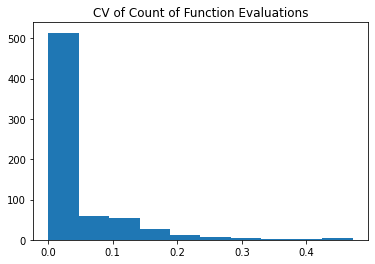

In [37]:
plt.hist(cv_df[cn.SD_CNT])
_ = plt.title("CV of Count of Function Evaluations")

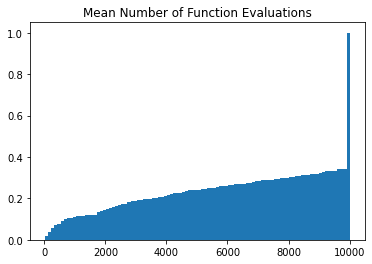

In [38]:
_ = plt.hist(mean_df[cn.SD_CNT], bins=100, cumulative=True, density=True)
_ = plt.title("Mean Number of Function Evaluations")

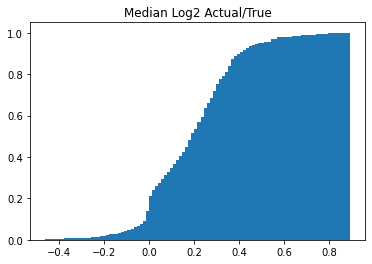

In [33]:
_ = plt.hist(mean_df[cn.SD_MEDIAN_ERR], bins=100, cumulative=True, density=True)
_ = plt.title("Median Log2 Actual/True")

Text(0, 0.5, 'function evaluations')

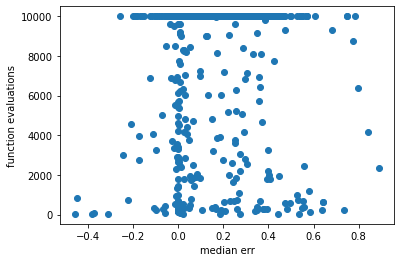

In [48]:
plt.scatter(mean_df[cn.SD_MEDIAN_ERR], mean_df[cn.SD_CNT])
plt.xlabel("median err")
plt.ylabel("function evaluations")